# CREDIT CARD FRAUD DETECTION AND PREVENTION

This notebook presents an end-to-end pipeline for detecting fraudulent credit card transactions using machine learning. The dataset is highly imbalanced, with only 0.17% of transactions labeled as fraud. I explored the data, preprocessed it, trained several models, and evaluated their performance.

## ENVIRONMENT SETUP AND DATA LOADING

### Import Libraries

In [1]:
# Core Librariies
import numpy as np
import pandas as pd
import scipy

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Model Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve

### Load the Dataset

In [2]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Inspect Basic Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## EXPLORATORY DATA ANALYSIS

In this section, I analyzed the distribution of features, especially the `Class` label, and observed how `Amount` and `Time` relate to fraud. I also looked at correlations between the anonymized features (V1–V28).

### Class Distribution

Class
0    284315
1       492
Name: count, dtype: int64
Fraudulent transactions: 0.1727%


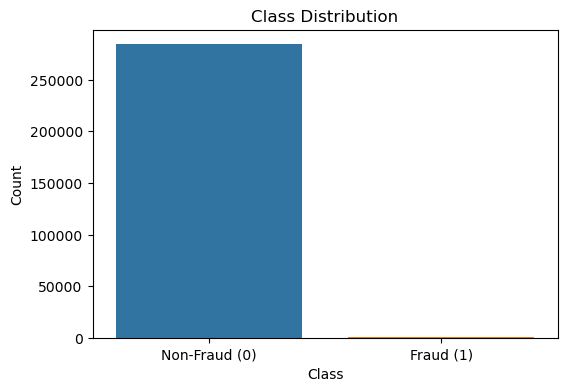

In [6]:
# Count of each Class
class_counts = df['Class'].value_counts()
print(class_counts)

# Percentage
fraud_percentage = class_counts[1] / class_counts.sum() * 100
print(f"Fraudulent transactions: {fraud_percentage:.4f}%")

# Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xticks([0,1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel('Count')
plt.show()

### Transaction Amount Distribution

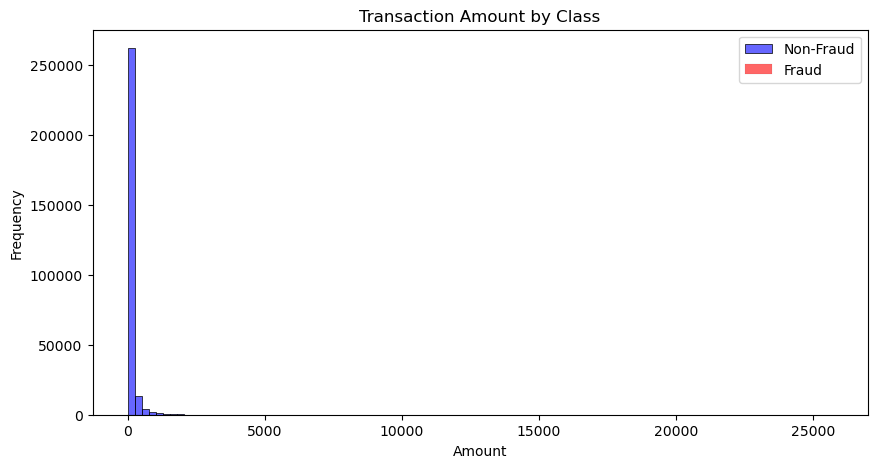

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Class']==0]['Amount'], bins=100, color='blue', label='Non-Fraud', alpha=0.6)
sns.histplot(df[df['Class']==1]['Amount'], bins=100, color='red', label='Fraud', alpha=0.6)
plt.legend()
plt.title('Transaction Amount by Class')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

### Time Distribution

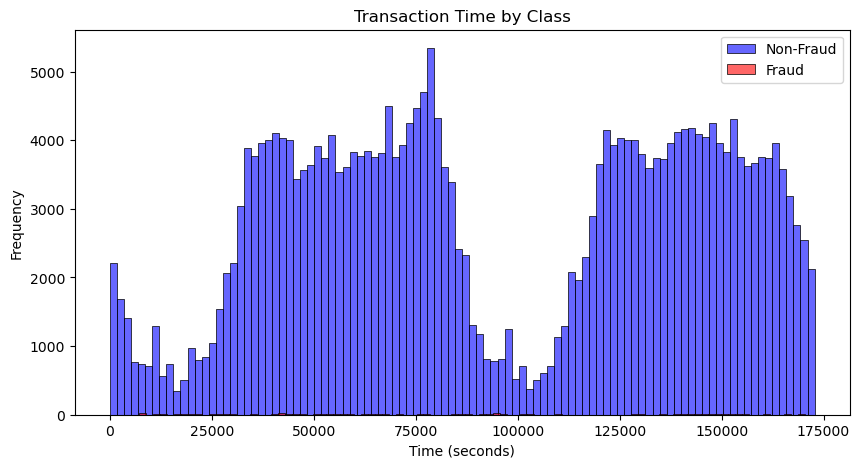

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Class']==0]['Time'], bins=100, color='blue', label='Non-Fraud', alpha=0.6)
sns.histplot(df[df['Class']==1]['Time'], bins=100, color='red', label='Fraud', alpha=0.6)
plt.legend()
plt.title('Transaction Time by Class')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()

### Correlation Heatmap

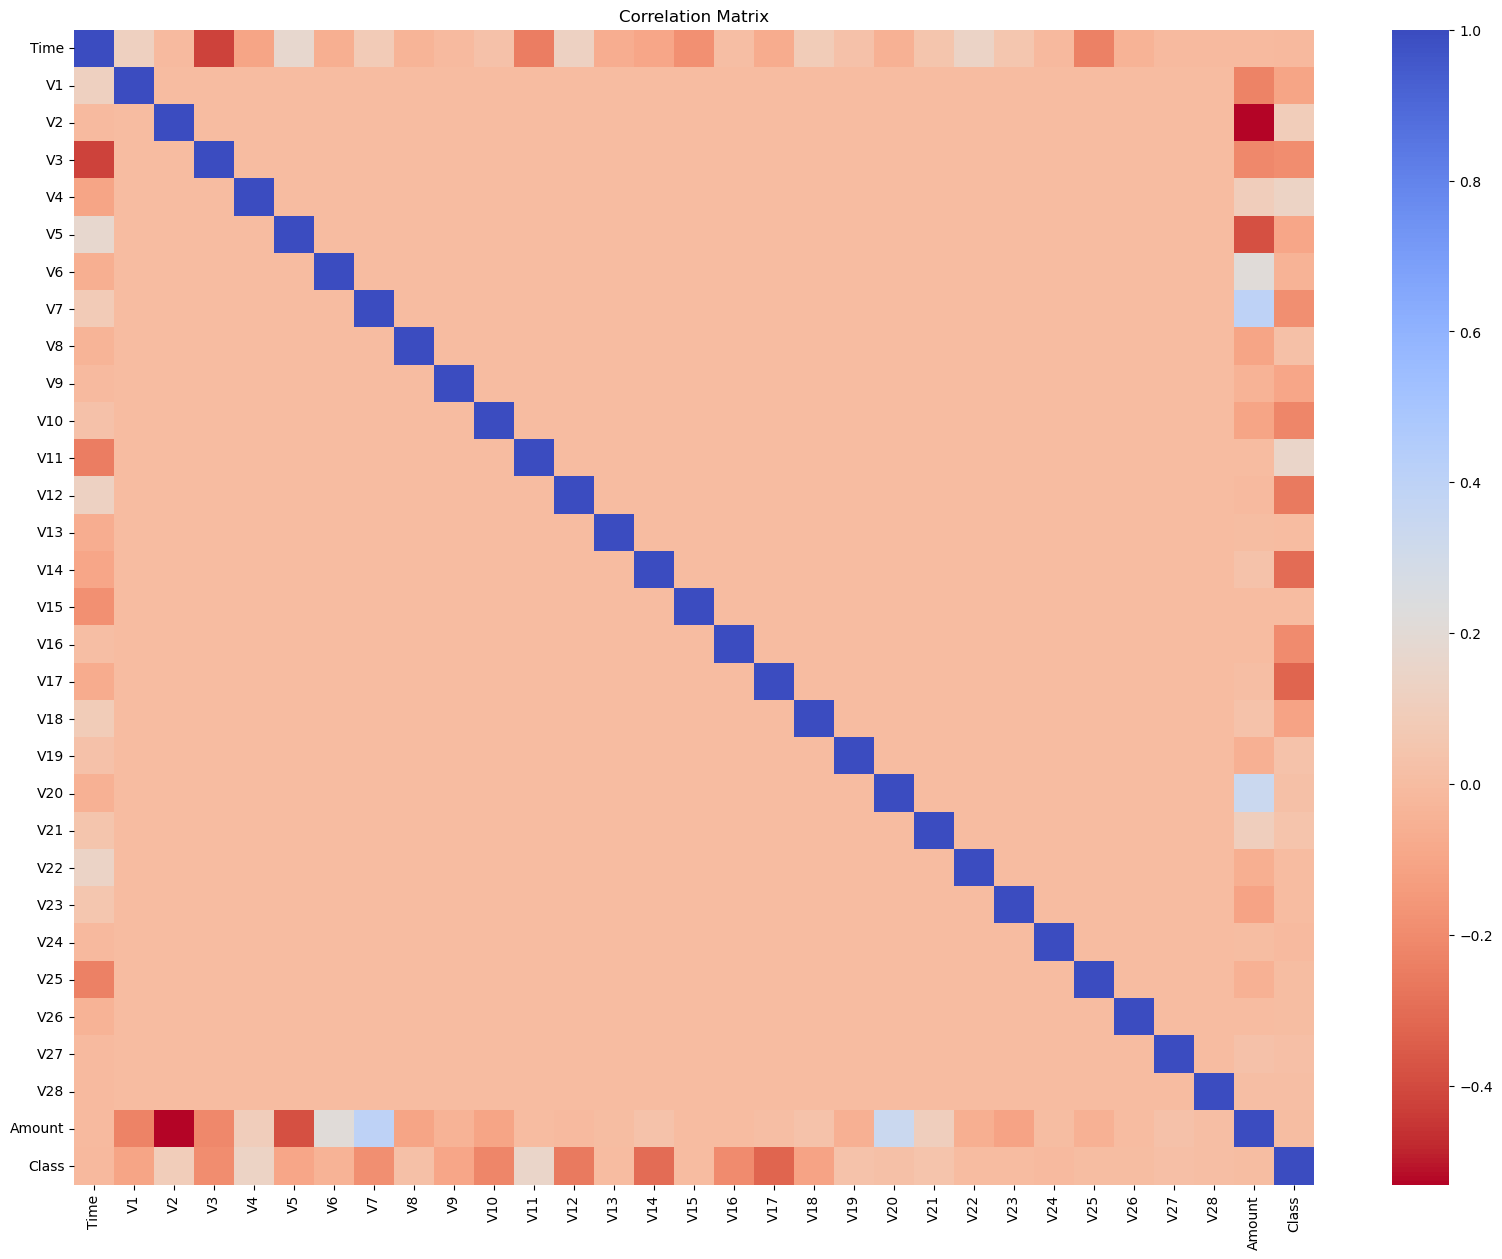

In [9]:
plt.figure(figsize=(20,15))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=False)
plt.title('Correlation Matrix')
plt.show()

### Boxplots of Selected Features

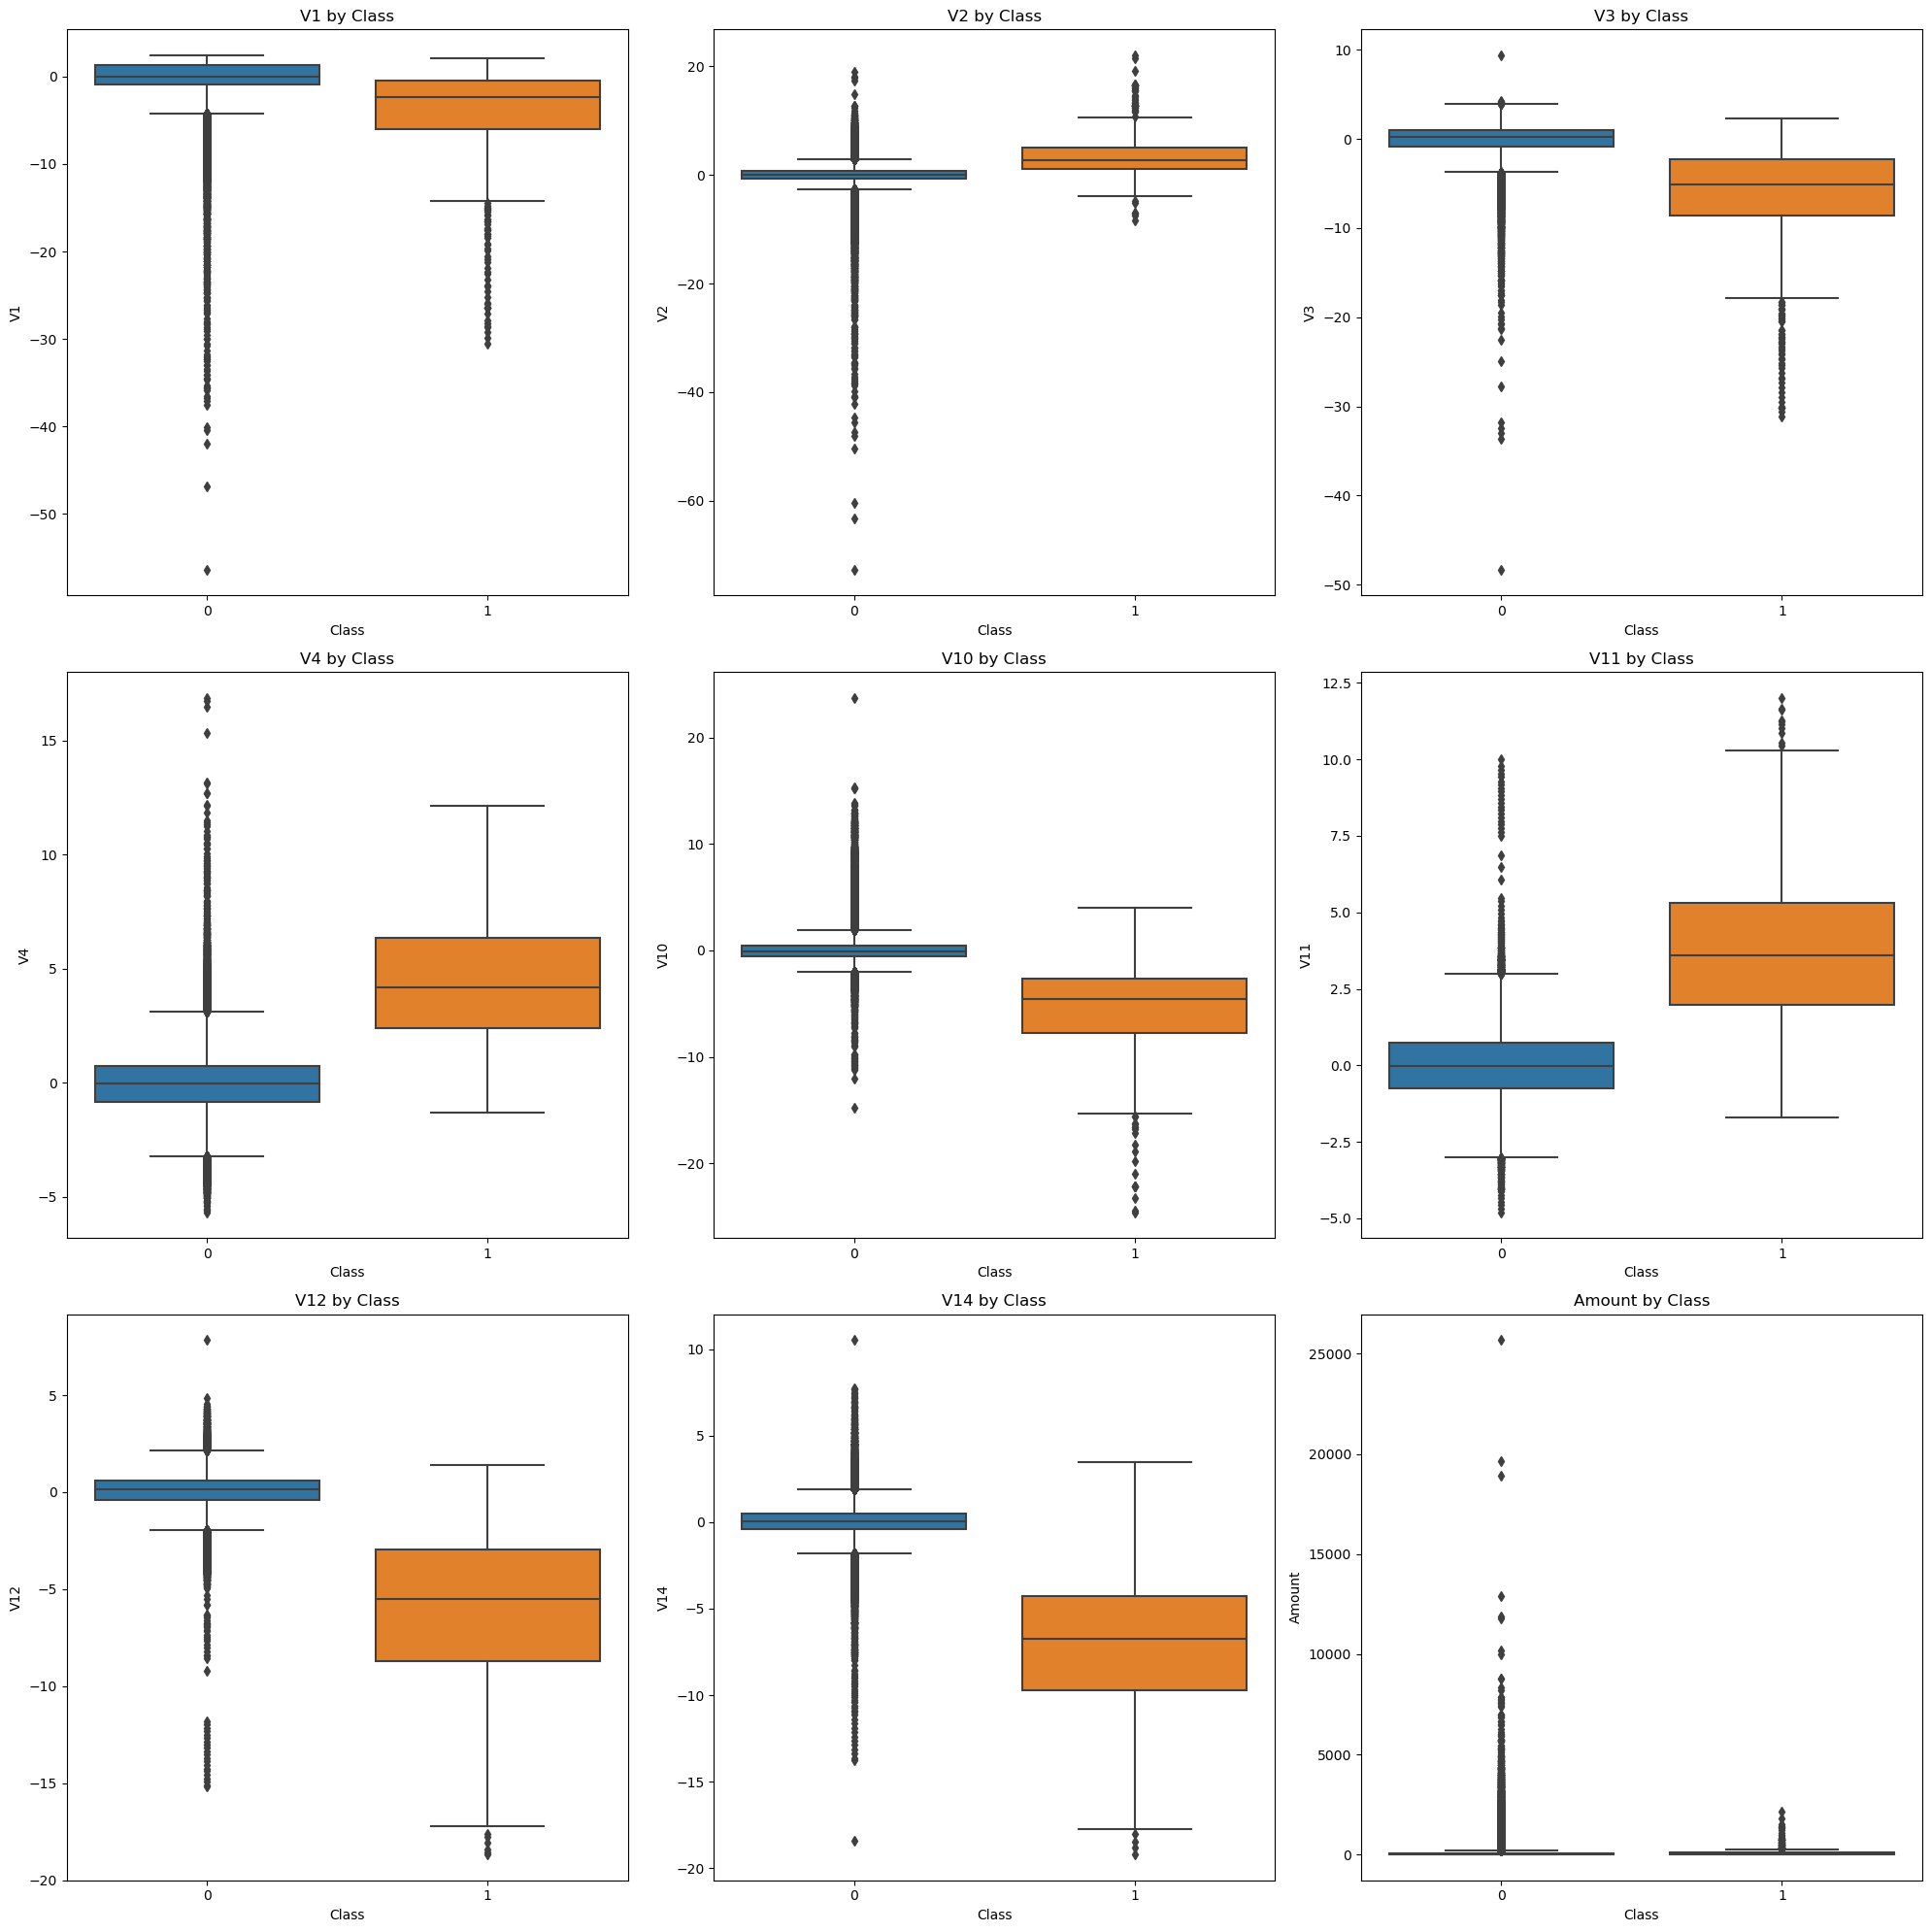

In [10]:
features_to_plot = ['V1', 'V2', 'V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'Amount']

plt.figure(figsize=(20,20))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3,3,i)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} by Class')
plt.tight_layout()
plt.show()

## DATA PREPROCESSING

### Scale 'Amount' and 'Time'

I scaled the `Amount` and `Time` features using StandardScaler, remove the original columns, and split the data into training and test sets. SMOTE is applied to balance the classes in the training set.

In [11]:
# Create a scaler
scaler = StandardScaler()

# Scale Amount and Time
df['Amount_Scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time_Scaled'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

### Drop Original 'Amount' and 'Time'

In [12]:
df.drop(['Amount', 'Time'], axis=1, inplace=True)

### Separate Features and Labels

In [13]:
x = df.drop('Class', axis=1)
y = df['Class']

### Split Train/Test Sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Training set:", X_train.shape, "Test set:", X_test.shape)

Training set: (199364, 30) Test set: (85443, 30)


### Balance the Training Set with SMOTE

In [15]:
sm = SMOTE(random_state=42)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE balanacing:")
print("Training samples:", X_train_res.shape)
print("Class distribution;")
print(pd.Series(y_train_res).value_counts())

After SMOTE balanacing:
Training samples: (398040, 30)
Class distribution;
Class
0    199020
1    199020
Name: count, dtype: int64


## MODEL TRAINING AND EVALUATION

I trained Logistic Regression, Random Forest, and XGBoost classifiers. Performance is evaluated using classification reports, confusion matrices, and ROC curves

### Logitic Regression

In [16]:
lr = LogisticRegression(max_iter=1000, random_state=42)

lr.fit(X_train_res, y_train_res)

# Predictions
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

### Random Forest

In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train_res, y_train_res)

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

### XGBoost

In [18]:
xgb = XGBClassifier(use_label_encorder=False, eval_metric='logloss', random_state=42)

xgb.fit(X_train_res, y_train_res)

# Predictions
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

C:\Users\Mollean\anaconda3\envs\learn-env\lib\site-packages\xgboost\core.py:158: UserWarning: [14:16:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encorder" } are not used.

  warnings.warn(smsg, UserWarning)


### Evaluation of all Models

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate_model(y_test, y_pred, y_prob, model_name):
    print(f"\nModel: {model_name}")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.show()


Model: Logistic Regression
              precision    recall  f1-score   support

           0     0.9998    0.9775    0.9885     85295
           1     0.0633    0.8784    0.1181       148

    accuracy                         0.9773     85443
   macro avg     0.5316    0.9279    0.5533     85443
weighted avg     0.9982    0.9773    0.9870     85443



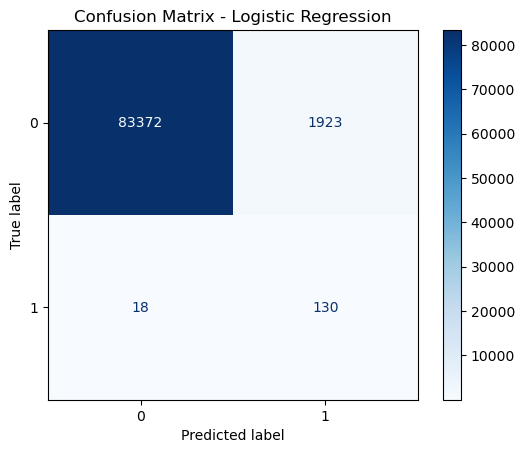

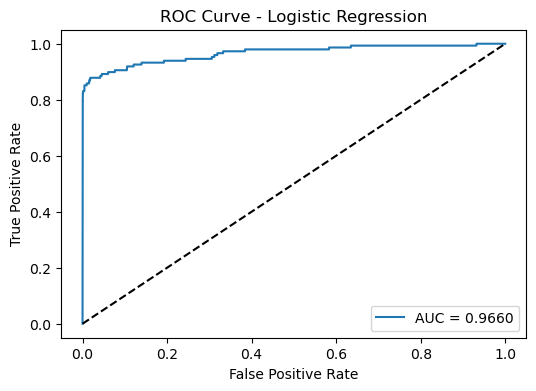


Model: Random Forest
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     85295
           1     0.8519    0.7770    0.8127       148

    accuracy                         0.9994     85443
   macro avg     0.9257    0.8884    0.9062     85443
weighted avg     0.9994    0.9994    0.9994     85443



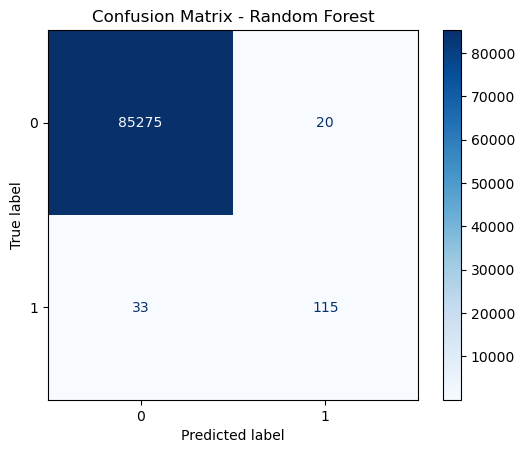

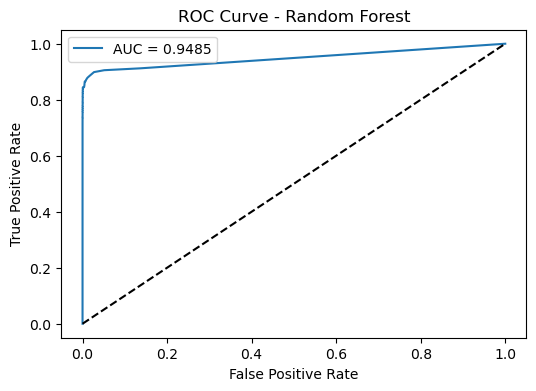


Model: XGBoost
              precision    recall  f1-score   support

           0     0.9997    0.9996    0.9996     85295
           1     0.7580    0.8041    0.7803       148

    accuracy                         0.9992     85443
   macro avg     0.8788    0.9018    0.8900     85443
weighted avg     0.9992    0.9992    0.9992     85443



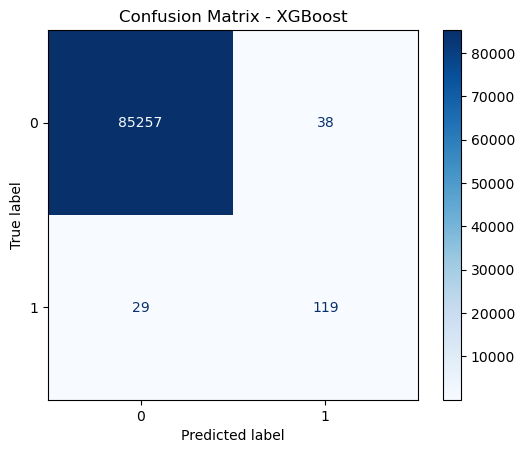

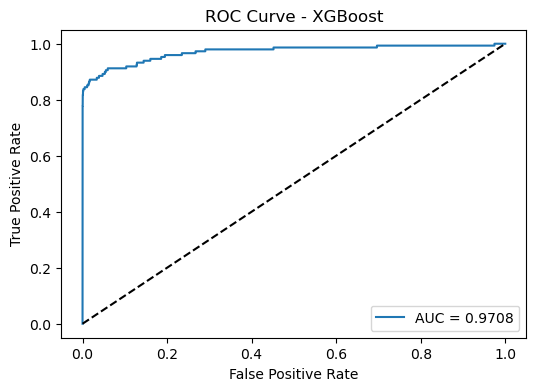

In [20]:
evaluate_model(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, y_prob_xgb, "XGBoost")

## VISUALIZATION

### Class Distribution

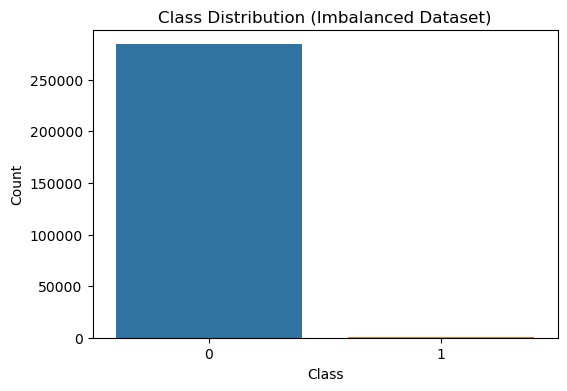

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (Imbalanced Dataset)')
plt.xticks([0,1]), ['Non-Fraud (0)', 'Fraud(1)']
plt.ylabel('Count')
plt.show()

### Transaction Amount by Class

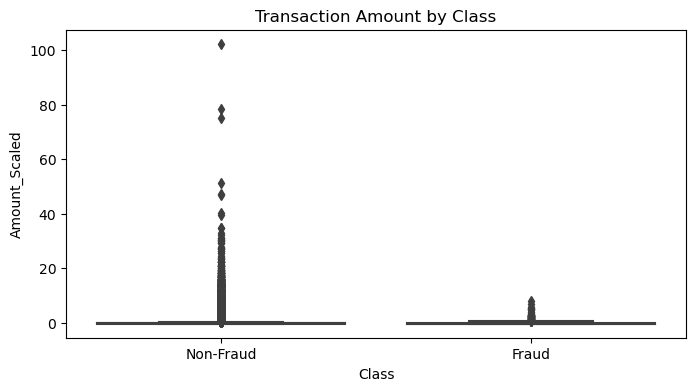

In [22]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Class', y='Amount_Scaled', data=df)
plt.title('Transaction Amount by Class')
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.show()

### Feature Importance (Random Forest)

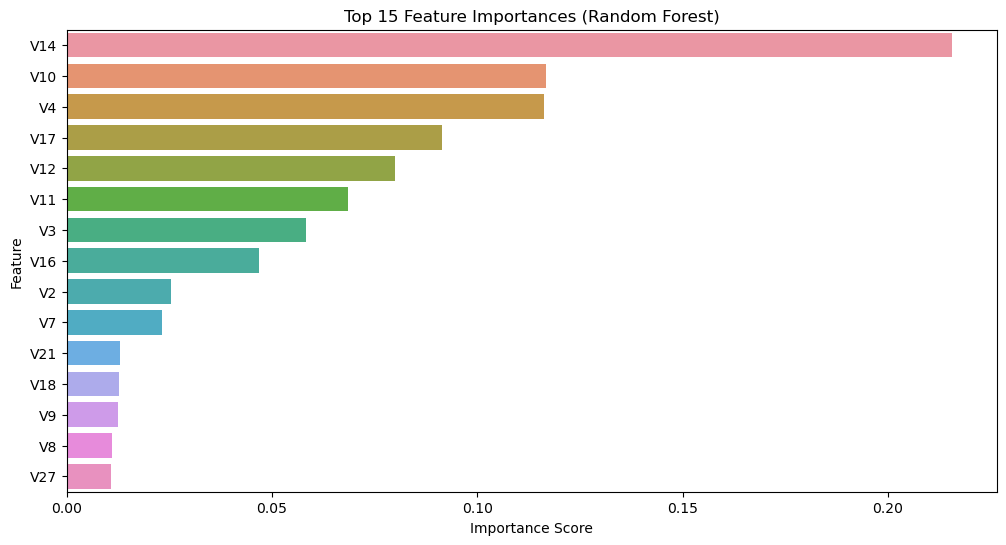

In [23]:
# Get Feature Importances
importances = rf.feature_importances_
features = X_train.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
sns.barplot(x=importances[indices][:15], y=features[indices][:15])
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

### Visual Comparison of Models

I compared model performance side-by-side using ROC curves and confusion matrices to determine the most effective fraud detection algorithm.

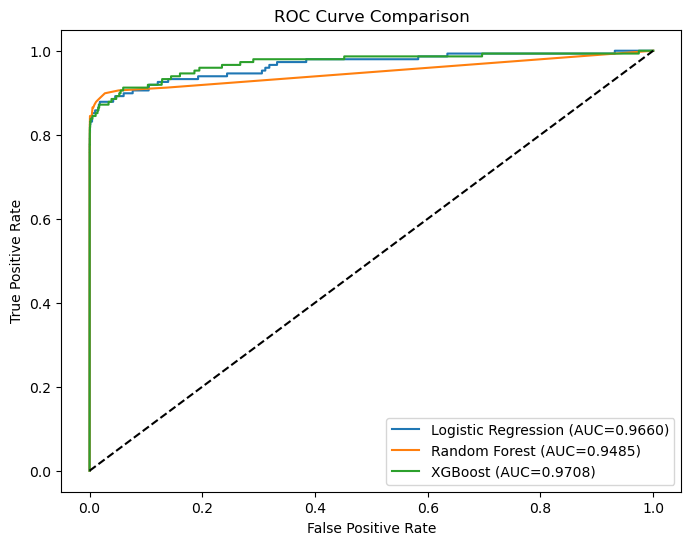

In [24]:
plt.figure(figsize=(8,6))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={auc_lr:.4f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={auc_rf:.4f})')

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={auc_xgb:.4f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

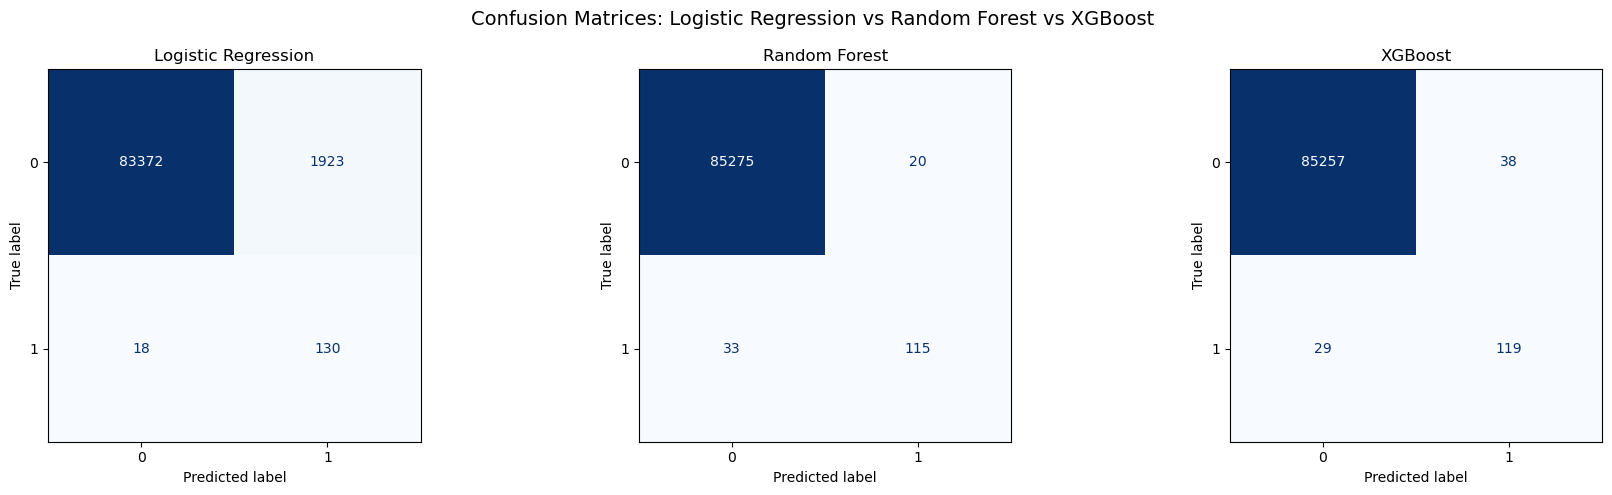

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Define models and their names
models = {
    "Logistic Regression": (y_test, y_pred_lr),
    "Random Forest": (y_test, y_pred_rf),
    "XGBoost": (y_test, y_pred_xgb)
}

# Plot confusion matrices
for ax, (name, (true, pred)) in zip(axes, models.items()):
    cm = confusion_matrix(true, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(name)

plt.suptitle("Confusion Matrices: Logistic Regression vs Random Forest vs XGBoost", fontsize=14)
plt.tight_layout()
plt.show()

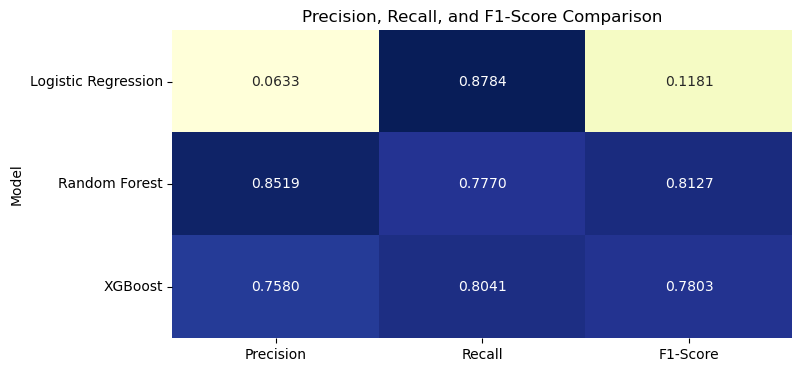

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

# Define model predictions
model_preds = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
}

# Collect metrics
metrics = []

for model_name, y_pred in model_preds.items():
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metrics.append({
        "Model": model_name,
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1-Score": round(f1, 4)
    })

# Create DataFrame
metrics_df = pd.DataFrame(metrics)
metrics_df.set_index("Model", inplace=True)

# Display comparison table
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.heatmap(metrics_df, annot=True, cmap="YlGnBu", fmt=".4f", cbar=False)
plt.title("Precision, Recall, and F1-Score Comparison")
plt.show()

### Observations

- **Best Model:** XGBoost with highest AUC
- **Key Insight:** Fraudulent transactions tend to have lower amounts and may cluster by time

## FRAUD PREVENTION STRATEGY

Deploy XGBoost model for real-time transaction scoring

Use dynamic thresholds to flag or block high-risk events

Integrate rule-based system for behavioral alerts

Add new data sources: geo-location, device ID, merchant info

Use dashboards to monitor fraud spikes and transaction heatmaps